# Taller 1: Análisis Exploratorio de Datos (EDA) y Visualización

Jose Julian Sanabria Mejia <br> Cod: 202224837 <br> jj.sanabria@uniandes.edu.co

MINE-4101: Ciencia de Dato Aplicada <br> Univerisdad de los Andes

Dataset: Spotify

Última Actualización: September, 2022

In [646]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import re

In [144]:
# Configuración de Panadas para extender el número de filas y columnas a visualizar
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Punto 0: Proceso de limpieza para calidad de datos

Para la correcta lectura del dataset, se realizaron las siguientes correcciones antes de cargarlo al Dataframe:

usando expresiones regulares:
Se buscó ;[\r\n]+" y se reemplazó por \r\n para quitar " al inicio de algunas línes
Se buscó ;[\r\n] y se reemplazó por \r para quitar ; al final de todas la líneas

Finalmente se ajustaron manualmente las comillas para las líneas:
1402
1494
1508
1785
1885




In [373]:
# El DataSet se abre como archivo y se extrea la información como texto
f = open ('./data/Data_Taller_1.csv','r', encoding='UTF8')
text = f.read()
f.close()

# Ajuste de comillas al texto para la correcta lectura con Pandas
text = text.replace('"""""', '"')
text = text.replace('"""', '"')
text = text.replace('""', '"')
text = text.replace('set()"', '')
text = text.replace('set()', '')

# Uso de expresión regular para: quitar punto y como (;) al final de una linea y comillas (") al inicio de la siguiente línes 
text = re.sub(r';[\r\n]+"', "\n", text)
# Uso de expresión regular para: quitar punto y como (;) al final de una linea 
text = re.sub(r';[\r\n]', "\n", text)

# Ajuste linea 1977, el nombre del artista contiene una coma
text = text.replace('Tyler, The Creator', '"Tyler, The Creator"')

# El texto corregido lo escribo sobre un archivo nuevo, para no perder la versión original y comparar la limpieza realizada.
f = open ('./data/Data_Taller_2.csv','w', encoding='UTF8')
f.write(text)
f.close()


In [374]:
# Carga del archivo CSV al que se realizó la limpieza como DataFrame de Pandas
sptf_df = pd.read_csv('./data/Data_Taller_2.csv')

In [375]:
# Describe las dimensiones del DataFrame
sptf_df.shape

(2000, 18)

In [376]:
# Describe las columnas y su tipo del DataFrame cargado
sptf_df.dtypes

artist               object
song                 object
duration_ms          object
explicit             object
year                float64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [377]:
# Filtra las filas donde year == NaN (año sea nulo)
sptf_df = sptf_df[sptf_df['year'].notna()]

#Converte la columna year de float a int
sptf_df['year'] = sptf_df['year'].astype('int64')


# Filtra las filas donde duration_ms == NaN (duración canción sea nula)
sptf_df = sptf_df[sptf_df['duration_ms'].notna()]

#Converte la columna duration_ms de object a float
sptf_df['duration_ms'] = sptf_df['duration_ms'].astype('float64')

# Filtra las filas donde genre == NaN (género sea nulo)
sptf_df = sptf_df[sptf_df['genre'].notna()]


## Punto 1: top 10 de artistas más activos de los últimos 10 años

Para este ejercicio se asume que los artistas más activos son aquellos que tienen mayor cantidad de canciones.

In [378]:
# Calcula el máximo año del DataFrame
max_year = sptf_df["year"].max()
max_year

2020

In [379]:
#Filtra los últimos 10 años (2011 a 2020) y selecciona las dos primeras columnas del DataFrame (artísta y canción)
top10_df = sptf_df[(sptf_df['year'] >= 2011)].iloc[:,0:2]

# Agrupa por artist y cuenta la cantidad de canciones (song)
top10_df = top10_df.groupby('artist').count()

#Filtra el top 10 con mayor conteo de canciones
top10_df = top10_df.nlargest(n=10, columns=['song']).reset_index()

# Muestra el top 10 de los artistas más activos en los últimos 10 años
top10_df

,artist,song
0,Drake,19
1,Calvin Harris,18
2,Ariana Grande,14
3,David Guetta,13
4,Taylor Swift,13
5,Katy Perry,11
6,Avicii,10
7,Chris Brown,10
8,Ed Sheeran,9
9,Jason Derulo,9


### Visualización

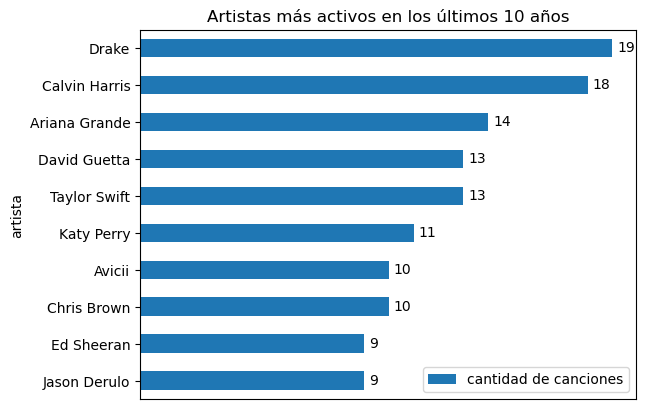

In [380]:
# Visualiza el top 10 de artistas más activos en los últimos 10 años
ax = top10_df.plot.barh(x='artist', y='song')
ax.invert_yaxis()
ax.set_ylabel('artista')
ax.set_title('Artistas más activos en los últimos 10 años')

#oculta el eje x
ax.get_xaxis().set_visible(False)

# cambia texto de la leyenda
L=plt.legend()
L.get_texts()[0].set_text('cantidad de canciones')

# asigna cantidad canciones frente a cada barra
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 1.5 ,
        rect.get_width(),
        fontsize=10
    )

## Punto 2: 

Halle la diferencia del tiempo promedio entre los géneros Latin y Folk/Acoustic

In [381]:
# Promedio tiempo duración canciones del género Folk/Acoustic
folk_mean = sptf_df[sptf_df['genre'].str.contains("Folk/Acoustic")]['duration_ms'].mean()
folk_mean

220183.65

In [382]:
# Promedio tiempo duración canciones del género latin
latin_mean = sptf_df[sptf_df['genre'].str.contains("latin")]['duration_ms'].mean()
latin_mean

227674.859375

In [383]:
# diferencia del tiempo promedio entre Latin y Folk/Acoustic
dif_mean = round(latin_mean - folk_mean, 2)
dif_mean

7491.21

### Visualización

Basado en las buenas prácticas del capitulo 2 del libro Storytelling with Data A Data Visualization Guide for Business Professionals, 
en lugar de realizar una gráfica para mostrar un solo número, es mejor mostrar ese número en texto sencillo.

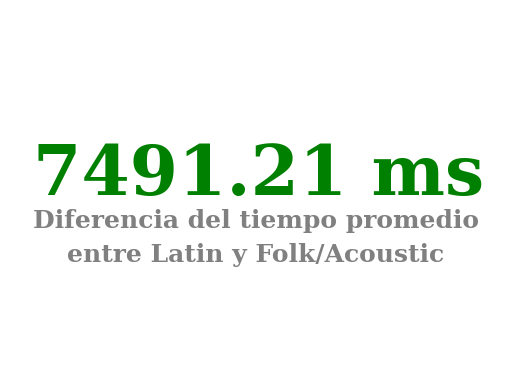

In [384]:
#create data dummy
x = [3, 16]
y = [4, 9]

#create scatterplot
ax =plt.scatter(x, y, color=['white'])

# formatos del texto
font = {'family': 'serif',
        'color':  'green',
        'weight': 'bold',
        'size': 50
        }

font2 = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 18
        }

#muestra textos
plt.text(3, 6.5, str(dif_mean) + " ms", fontdict=font)
plt.text(3, 6.0, "Diferencia del tiempo promedio", fontdict=font2)
plt.text(4, 5.5, "entre Latin y Folk/Acoustic", fontdict=font2)

#oculta el ejes
plt.axis('off')

plt.show()

## Punto 3: 

Top 5 de géneros en los años 2000, 2005, 2010, 2015, 2019 según la cantidad de canciones


In [574]:
# filtrar años requeridos
dev_df = sptf_df[sptf_df.year.isin([2000, 2005, 2010, 2015, 2019])]

In [575]:
#desagregar columna género
dev_df = dev_df[['year','song','genre']]
year = []
song = []
genre = []
for i in dev_df.index:
    genre_list = dev_df["genre"][i].split(',')
    for gen in genre_list:
        year.append(dev_df["year"][i])
        song.append(dev_df["song"][i])
        genre.append(gen.strip().replace('"',''))
        
data = {'year': year,
    'song': song,
    'genre': genre}
new_df = pd.DataFrame(data)

new_df

,year,song,genre
0,2000,Oops!...I Did It Again,pop
1,2000,It's My Life,rock
2,2000,It's My Life,metal
3,2000,Bye Bye Bye,pop
4,2000,The Real Slim Shady,hip hop
...,...,...,...
884,2019,Cruel Summer,pop
885,2019,The Git Up,hip hop
886,2019,The Git Up,country
887,2019,Dancing With A Stranger (with Normani),pop


In [576]:
# Agrupa por año y género y cuenta la cantidad de canciones (song)
top5_df = new_df.groupby(['year','genre']).count().reset_index()

#Filtra el top 5 de géneros con mayor conteo de canciones por cada año
top5_df = top5_df.nlargest(n=25, columns=['song', 'year'])
top5_df.sort_values(by=['year', 'song'], inplace=True, ascending=False)

# Muestra el top 5 de los géneros mas sonados por año (2000, 2005, 2010, 2015, 2019)
top5_df

,year,genre,song
43,2019,pop,63
40,2019,hip hop,38
37,2019,Dance/Electronic,21
38,2019,R&B,9
41,2019,latin,8
35,2015,pop,88
33,2015,hip hop,33
30,2015,Dance/Electronic,28
31,2015,R&B,21
36,2015,rock,14


### Visualización


In [577]:
# convierte el dataframe en una tabla cruzada
df = pd.crosstab(top5_df.year, top5_df.genre,values=top5_df.song, aggfunc='sum')
df = df.reset_index()
df

genre,year,Dance/Electronic,R&B,hip hop,latin,metal,pop,rock
0,2000,NaN,25.0,21.0,NaN,8.0,57.0,13.0
1,2005,5.0,31.0,51.0,NaN,NaN,81.0,19.0
2,2010,28.0,23.0,54.0,NaN,NaN,97.0,6.0
3,2015,28.0,21.0,33.0,NaN,NaN,88.0,14.0
4,2019,21.0,9.0,38.0,8.0,NaN,63.0,NaN


Text(0.5, 1.0, 'Top 5 de géneros por año')

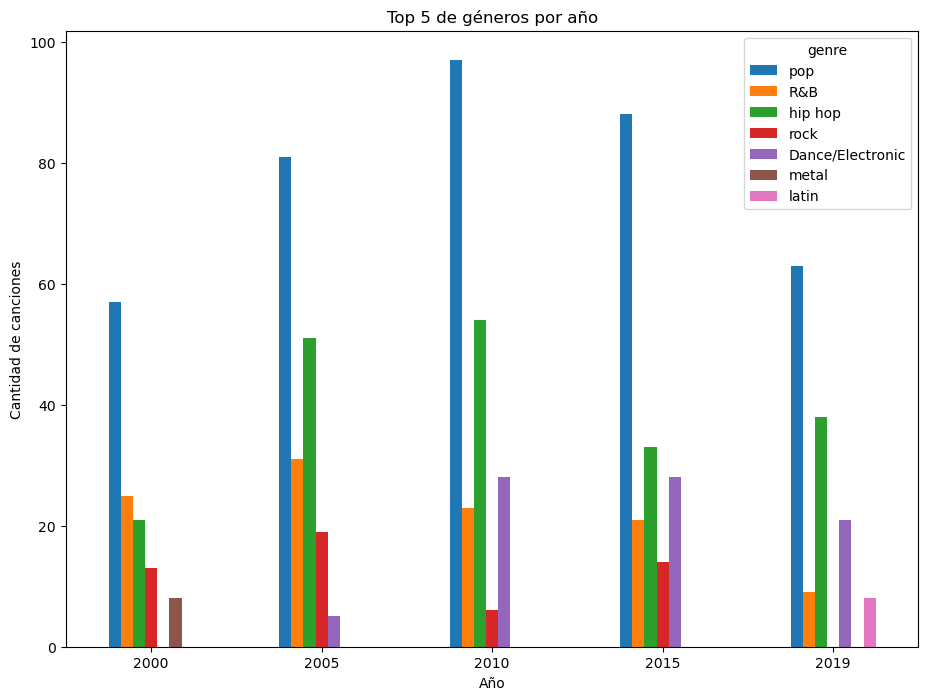

In [647]:
ax = df.plot.bar(x='year', y=["pop", "R&B", "hip hop", "rock", "Dance/Electronic", "metal", "latin"],figsize=(11,8))
ax.set_ylabel('Cantidad de canciones')
ax.set_xlabel('Año')
ax.tick_params(axis="x", labelrotation = 0)
ax.set_title('Top 5 de géneros por año')

### Análisis
    * 2010 es el año con mayor cantidad de canciones en el top 5 de géneros
    * A través de los años estudiados, el género pop se ha mantenidos en el top 1 con la mayor cantidad de canciones
    * Los géneros pop, R&B y hip hop son una constante a través de los años estudiados.
        

## Punto 4: ¿Cómo ha sido la progresión de nuevos artistas?

Se asume que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

In [472]:
sptf_df['year'].unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2020, 2007, 2009, 2012, 2017,
       2014], dtype=int64)

In [550]:
# inicializa las listas para el dataframe del resultado
year = []
count = []

for i in range(1999,2020):
    # se genera un dataframe con los artistis de los años anterios a i
    df1 = sptf_df[(sptf_df['year'] < i)].drop_duplicates(subset=['artist'])[['artist']]
    # se genera un dataframe con los artistis del año i
    df2 = sptf_df[(sptf_df['year'] == i)].drop_duplicates(subset=['artist'])[['artist']]
    
    # se hace merge con los dos dataframe de artistas y se identifican los artistas nuevos
    df3 = df2.merge(df1, how='outer', indicator='union')
    df3 = df3[(df3['union'] == 'left_only')][['artist']]
    
    # se adiciona el año y la cantidad de artistas nuevos las listas
    year.append(i)
    count.append(len(df3))

# se crea un dataframe resultado a partir de las listas
data = {'año': year,
    'cantArtsNuevos': count}
new_art_df = pd.DataFrame(data)
new_art_df

,año,cantArtsNuevos
0,1999,29
1,2000,55
2,2001,60
3,2002,38
4,2003,42
5,2004,40
6,2005,39
7,2006,37
8,2007,35
9,2008,34


### Visualización

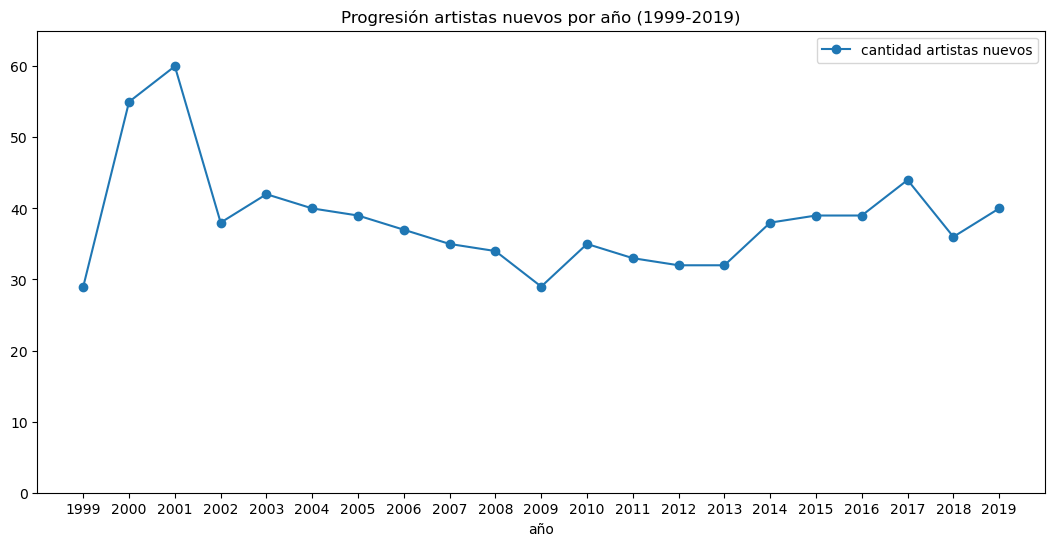

In [559]:
# Visualiza la progresión de artistas nuevos por año
ax = new_art_df.plot(x='año', y='cantArtsNuevos', marker="o",figsize=(13,6))
ax.set_title('Progresión artistas nuevos por año (1999-2019)')

ax.set_ylim(0, 65)
ax.set_xlim(1998, 2020)

plt.xticks([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

# cambia texto de la leyenda
L=plt.legend()
L.get_texts()[0].set_text('cantidad artistas nuevos')



### Análisis

Durante los primeros 3 años (1999-2001) del análisis, la cantidad de artistas nuevos es alta debido a ausencia de datos para años anteriores.
Después de los 3 primeros años del análisis, la cantidad promedio de artistas nuevos es de aproximadamente 36 por año

## Punto 5: 
Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica

In [606]:
# omite primer y última año por la poco información
dev_df = sptf_df[(sptf_df['year'] != 1998) & (sptf_df['year'] != 2020)][['year', 'popularity','genre']]

In [607]:
#desagregar columna género
year = []
song = []
genre = []
for i in dev_df.index:
    genre_list = dev_df["genre"][i].split(',')
    for gen in genre_list:
        year.append(dev_df["year"][i])
        song.append(dev_df["popularity"][i])
        genre.append(gen.strip().replace('"',''))
        
data = {'year': year,
    'popularity': song,
    'genre': genre}
new_df = pd.DataFrame(data)

new_df

,year,popularity,genre
0,2000,77.0,pop
1,1999,79.0,rock
2,1999,79.0,pop
3,1999,66.0,pop
4,1999,66.0,country
...,...,...,...
3663,2019,78.0,pop
3664,2019,69.0,hip hop
3665,2019,69.0,country
3666,2019,75.0,pop


In [609]:
new_df = new_df.groupby(['year','genre']).mean().reset_index()
new_df

,year,genre,popularity
0,1999,Dance/Electronic,57.000000
1,1999,Folk/Acoustic,65.000000
2,1999,R&B,64.000000
3,1999,blues,66.000000
4,1999,country,66.000000
...,...,...,...
175,2019,hip hop,65.027027
176,2019,latin,74.750000
177,2019,metal,32.500000
178,2019,pop,60.951613


### Visualización

In [614]:
genre_list = new_df['genre'].unique()
genre_list

array(['Dance/Electronic', 'Folk/Acoustic', 'R&B', 'blues', 'country',
       'easy listening', 'hip hop', 'latin', 'metal', 'pop', 'rock',
       'World/Traditional', 'jazz', 'classical'], dtype=object)

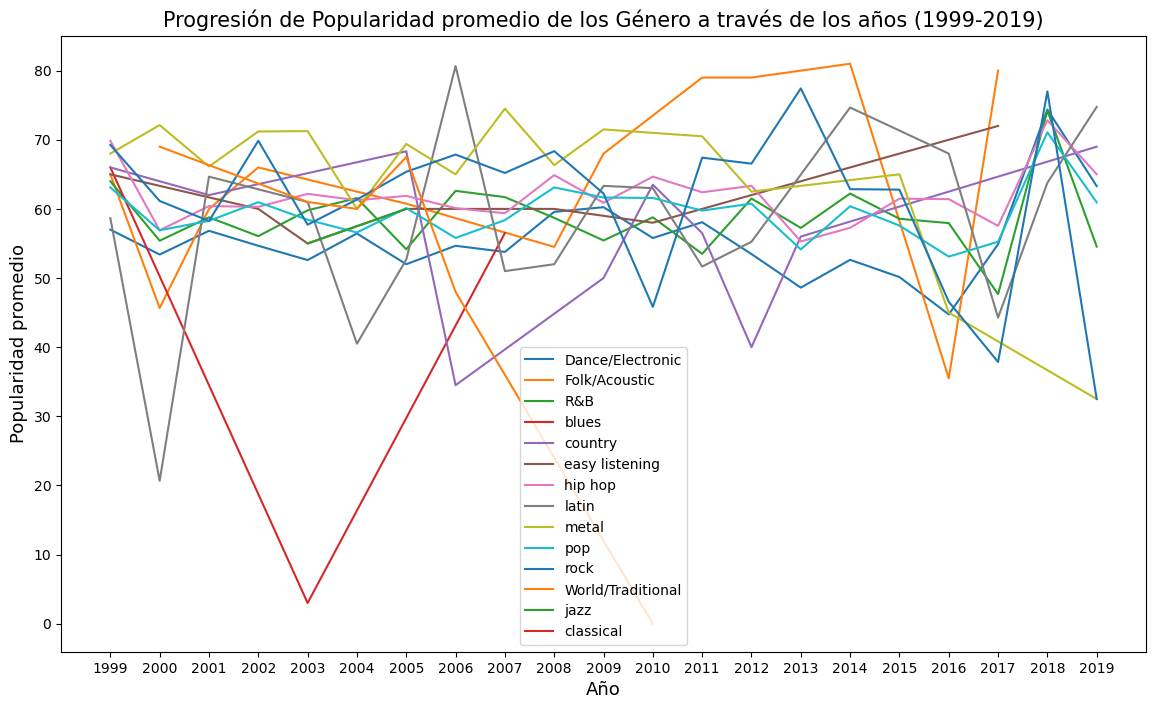

<Figure size 1400x800 with 0 Axes>

In [623]:
plt.figure(figsize=(14,8))
plt.xticks([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
for genre in genre_list:
    # if genre in ['pop', 'hip hop', 'R&B', 'Dance/Electronic']:
    genre_df = new_df[(new_df['genre'] == genre)][['year', 'popularity']]
    plt.plot(genre_df['year'],genre_df['popularity'],label=genre)
plt.title("Progresión de Popularidad promedio de los Género a través de los años (1999-2019)",fontsize=15)
plt.legend()
plt.xlabel("Año",fontsize=13)
plt.ylabel("Popularidad promedio",fontsize=13)
plt.figure(figsize=(14,8))
ax = plt.show()




### Análisis
- En los años 2016 y 2017 para la mayoría de los géneros la popularidad descendió.
- Mentras que para el año 2018 la mayoría de géneros aumentaron su popularidad.
- pop, hip hop, R&B y Dance/Electronic son géneros que mantienen su popularidad estable a lo largo de los años estudiados

## Punto 6: Compración Pop vs Rock

Comparión de los géneros Pop y Rock según sus características de: energy, valence y tempo.

In [630]:
# filtra filas a trabajar
dev_df = sptf_df[['genre', 'energy', 'valence', 'tempo']]

In [631]:
#desagregar columna género
genre = []
energy = []
valence = []
tempo = []
for i in dev_df.index:
    genre_list = dev_df["genre"][i].split(',')
    for gen in genre_list:
        energy.append(dev_df["energy"][i])
        valence.append(dev_df["valence"][i])
        tempo.append(dev_df["tempo"][i])
        genre.append(gen.strip().replace('"',''))
        
data = {'genre': genre,
    'energy': energy,
    'valence': valence,
    'tempo': tempo}
new_df = pd.DataFrame(data)

new_df

,genre,energy,valence,tempo
0,pop,0.834,0.894,95.053
1,rock,0.897,0.684,148.726
2,pop,0.897,0.684,148.726
3,pop,0.496,0.278,136.859
4,country,0.496,0.278,136.859
...,...,...,...,...
3671,pop,0.702,0.564,169.994
3672,hip hop,0.678,0.811,NaN
3673,country,0.678,0.811,NaN
3674,pop,0.520,0.347,102.998


In [660]:
# filtra géneros a trabajar
new_df = new_df[new_df.genre.isin(['pop', 'rock'])]
# calcula promedio de las características para los géneros (pop y rock)
new_df2 = new_df.groupby(['genre']).mean().reset_index()
new_df2

,genre,energy,valence,tempo
0,pop,0.715197,0.554114,119.670526
1,rock,0.793763,0.526054,125.919858


### Visualización

Text(0.5, 1.0, 'Rock vs Pop (Energía, Balance y Tempo)')

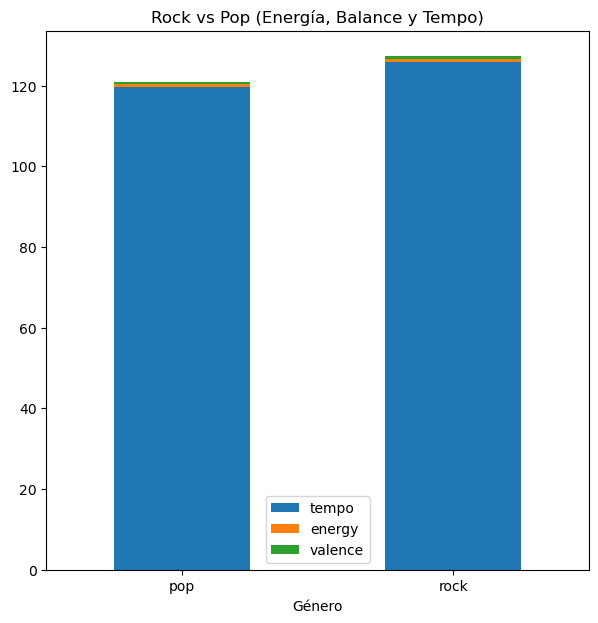

In [661]:
ax = new_df2.plot.bar(x='genre', y=["tempo", "energy", "valence"],figsize=(7,7), stacked = 'True')
ax.set_ylabel('')
ax.set_xlabel('Género')
ax.tick_params(axis="x", labelrotation = 0)
ax.set_title('Rock vs Pop (Energía, Balance y Tempo)')

### Análisis
- El rock cuenta con mayor enegía y tempo que el pop, mientra que el pop cuenta con mayor balance. Pero sus diferencia son muy pequeñas y las tres característica tienden a ser muy similares para ambos géneros.


## Punto 7: Plantee una pregunta de negocio de su interés

Cuál es el top 3 de los tres géneros más bailables para los años 2000, 2009 y 2019.

In [702]:
# selecciona años y filtra filas a trabajar
dev_df = sptf_df[(sptf_df['year'] == 2000) | (sptf_df['year'] == 2009) | (sptf_df['year'] == 2019)][['genre', 'year','danceability']]

# Filtra las filas donde danceability == NaN (danzabilidad sea nula)
dev_df = dev_df[dev_df['danceability'].notna()]

In [703]:
#desagregar columna género
genre = []
year = []
danceability = []
for i in dev_df.index:
    genre_list = dev_df["genre"][i].split(',')
    for gen in genre_list:
        danceability.append(dev_df["danceability"][i])
        year.append(dev_df["year"][i])
        genre.append(gen.strip().replace('"',''))
        
data = {'year': year,
    'genre': genre,
    'danceability': danceability}
new_df = pd.DataFrame(data)

new_df

,year,genre,danceability
0,2000,pop,0.751
1,2000,rock,0.551
2,2000,metal,0.551
3,2000,pop,0.614
4,2000,hip hop,0.949
...,...,...,...
428,2019,pop,0.552
429,2019,hip hop,0.847
430,2019,country,0.847
431,2019,pop,0.741


In [704]:
# calcula promedio de la danzabilidad por género y año
new_df2 = new_df.groupby(['year','genre']).mean().reset_index()
new_df2

,year,genre,danceability
0,2000,Dance/Electronic,0.677400
1,2000,Folk/Acoustic,0.477667
2,2000,R&B,0.767600
3,2000,World/Traditional,0.418000
4,2000,hip hop,0.767524
5,2000,latin,0.613000
6,2000,metal,0.510750
7,2000,pop,0.697912
8,2000,rock,0.552385
9,2009,Dance/Electronic,0.633500


In [715]:
# filtra top 3 genéros más bailables año 2000
top2000 = new_df2[(new_df2['year'] == 2000)]
top2000 = top2000.nlargest(n=3, columns=['danceability'])
top2000

,year,genre,danceability
2,2000,R&B,0.767600
4,2000,hip hop,0.767524
7,2000,pop,0.697912


In [716]:
# filtra top 3 genéros más bailables año 2009
top2009 = new_df2[(new_df2['year'] == 2009)]
top2009 = top2009.nlargest(n=3, columns=['danceability'])
top2009

,year,genre,danceability
14,2009,latin,0.846333
13,2009,hip hop,0.678500
9,2009,Dance/Electronic,0.633500


In [717]:
# filtra top 3 genéros más bailables año 2019
top2019 = new_df2[(new_df2['year'] == 2019)]
top2019 = top2019.nlargest(n=3, columns=['danceability'])
top2019

,year,genre,danceability
20,2019,country,0.847000
21,2019,hip hop,0.756132
22,2019,latin,0.730250


## Análisis
- El Hip hip siempre es el segundo género más bailable de cada año del estudio.